In [3]:
import json
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# reading training data
path = "/Users/kalnisp/KAUST Dropbox/Panos Kalnis/SSTD 2025 Paper/Data Porto/"
filename = "test.csv"
zf = zipfile.ZipFile(path+filename+".zip")
df = pd.read_csv(zf.open(filename), converters={'POLYLINE': lambda x: json.loads(x)})
latlong = np.array([[p[0][1], p[0][0]] for p in df['POLYLINE'] if len(p)>0])

In [4]:
df.count

<bound method DataFrame.count of     TRIP_ID CALL_TYPE  ORIGIN_CALL  ORIGIN_STAND   TAXI_ID   TIMESTAMP  \
0        T1         B          NaN          15.0  20000542  1408039037   
1        T2         B          NaN          57.0  20000108  1408038611   
2        T3         B          NaN          15.0  20000370  1408038568   
3        T4         B          NaN          53.0  20000492  1408039090   
4        T5         B          NaN          18.0  20000621  1408039177   
..      ...       ...          ...           ...       ...         ...   
315    T323         A      70885.0           NaN  20000430  1419171485   
316    T324         B          NaN          53.0  20000020  1419170802   
317    T325         C          NaN           NaN  20000207  1419172121   
318    T326         A      76232.0           NaN  20000667  1419171980   
319    T327         A      31208.0           NaN  20000255  1419171420   

    DAY_TYPE  MISSING_DATA                                           POLYLINE 

In [8]:
i=0
for p in df['POLYLINE']:
    print(i, len(p))
    i += 1

0 11
1 40
2 40
3 8
4 2
5 137
6 24
7 17
8 43
9 79
10 63
11 17
12 5
13 76
14 54
15 97
16 27
17 63
18 31
19 164
20 6
21 13
22 18
23 4
24 10
25 12
26 5
27 3
28 51
29 40
30 45
31 27
32 38
33 1
34 48
35 157
36 70
37 24
38 7
39 21
40 48
41 7
42 40
43 59
44 16
45 13
46 31
47 18
48 39
49 57
50 64
51 23
52 19
53 44
54 39
55 23
56 53
57 22
58 134
59 38
60 16
61 10
62 20
63 24
64 23
65 59
66 26
67 24
68 41
69 9
70 470
71 112
72 11
73 78
74 68
75 11
76 2
77 33
78 12
79 80
80 33
81 19
82 49
83 97
84 25
85 42
86 43
87 37
88 35
89 42
90 70
91 42
92 29
93 3
94 225
95 138
96 17
97 67
98 22
99 20
100 66
101 47
102 25
103 9
104 10
105 15
106 9
107 64
108 10
109 29
110 32
111 35
112 19
113 23
114 21
115 19
116 64
117 152
118 51
119 11
120 36
121 1
122 2
123 5
124 30
125 387
126 29
127 35
128 62
129 22
130 9
131 46
132 192
133 11
134 11
135 45
136 21
137 29
138 37
139 44
140 25
141 15
142 83
143 155
144 23
145 20
146 13
147 29
148 32
149 71
150 12
151 10
152 23
153 11
154 49
155 19
156 22
157 5
158 44
159 2

In [9]:
print(df.iloc[200]["POLYLINE"])

[[-8.605854, 41.184477], [-8.607861, 41.184774], [-8.608815, 41.184729], [-8.608842, 41.18472], [-8.609535, 41.184603], [-8.609886, 41.184504], [-8.610705, 41.184243], [-8.611182, 41.184072], [-8.611173, 41.184072], [-8.611317, 41.184018], [-8.611956, 41.183748], [-8.612145, 41.183667], [-8.612127, 41.183667], [-8.612145, 41.183667], [-8.612469, 41.183559], [-8.613414, 41.183406], [-8.613297, 41.184117], [-8.613198, 41.184684], [-8.613, 41.185917], [-8.612775, 41.186952], [-8.61255, 41.187789], [-8.612244, 41.188833], [-8.611794, 41.190543], [-8.611407, 41.192064], [-8.611407, 41.192298], [-8.611425, 41.192289], [-8.611434, 41.192433], [-8.611362, 41.192937], [-8.611353, 41.192928], [-8.611389, 41.192928], [-8.611443, 41.192955], [-8.611443, 41.192982], [-8.611299, 41.193945], [-8.611092, 41.195385], [-8.611002, 41.195772], [-8.610993, 41.195808], [-8.61093, 41.196474], [-8.610894, 41.197752], [-8.611299, 41.198994], [-8.611848, 41.200335], [-8.612316, 41.201136], [-8.61336, 41.202441]

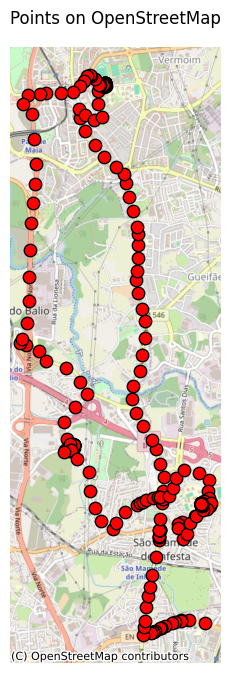

In [38]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx
import pyproj

# Bounding box
max_lat = 41.237424
max_lon = -8.553186
min_lat = 41.123232
min_lon = -8.687466

# Points (latitude, longitude)
points = [
    (41.237424, -8.553186),
    (41.123232, -8.687466)
]

points = [tuple(lst) for lst in df.iloc[200]["POLYLINE"]]


# Convert points to GeoDataFrame
geometry = [Point(lat, lon) for lat, lon in points]  # note: Point(Lon, lat)
gdf = gpd.GeoDataFrame(geometry=geometry, crs="EPSG:4326")  # WGS84 Lat/Lon

# Project to Web Mercator for contextily
gdf = gdf.to_crs(epsg=3857)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, marker='o', color='red', edgecolor='black', markersize=80)

# Add OpenStreetMap tiles
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, reset_extent=True)

# Set x/y limits based on bounding box (also reprojected to 3857)
project = pyproj.Transformer.from_crs("EPSG:4326", "EPSG:3857", always_xy=True).transform

min_x, min_y = project(min_lon, min_lat)
max_x, max_y = project(max_lon, max_lat)

#ax.set_xlim(min_x, max_x)
#ax.set_ylim(min_y, max_y)

# Remove axis clutter
ax.set_axis_off()

plt.title('Points on OpenStreetMap')
plt.show()


In [39]:
import csv

# Save to CSV
with open('trajectory.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Lon', 'Lat'])    # write a header first
    writer.writerows(points) # Write the data

In [29]:
print(gdf)

                          geometry
0  POINT (-958051.383 5041190.448)


In [41]:
# Install required libraries if you haven't already
# pip install geopandas contextily matplotlib shapely

import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx

# Define the POIs with their names and coordinates (Longitude, Latitude)
pois = {
    1: ("Douro River", (-8.611, 41.140)),
    2: ("São Bento Station", (-8.61099, 41.14557)),
    3: ("Clérigos Tower", (-8.6142, 41.1456)),
    4: ("Livraria Lello", (-8.61475, 41.14613)),
    5: ("Aliados Avenue", (-8.6103, 41.1481)),
    6: ("Matosinhos Beach", (-8.6897, 41.1791))
}

# Convert POIs to GeoDataFrame
poi_points = [Point(lon, lat) for _, (lon, lat) in pois.items()]
gdf_pois = gpd.GeoDataFrame(geometry=poi_points, crs="EPSG:4326")

# Project to Web Mercator
gdf_pois = gdf_pois.to_crs(epsg=3857)

# Plotting
fig, ax = plt.subplots(figsize=(12, 10))
gdf_pois.plot(ax=ax, marker='o', color='red', edgecolor='black', markersize=100)

# Annotate points with their number
for idx, row in enumerate(gdf_pois.geometry):
    ax.text(row.x + 30, row.y + 30, str(idx + 1), fontsize=12, weight='bold')

# Add OpenStreetMap tiles
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, reset_extent=True)

# Remove axis clutter
ax.set_axis_off()

# Create custom legend
legend_labels = [f"{i}: {pois[i][0]}" for i in pois]
legend_text = "\n".join(legend_labels)
plt.legend([legend_text], loc='lower right', fontsize='large', frameon=True)

plt.title('POIs from the Taxi Story', fontsize=16)
plt.show()


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.